In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

#### I have imported all the necessary libraries for this project.
 
 # Step 1 : Data Preprocessing

In [3]:
#load the dataset
boston=load_boston()
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#put the data into pandas dataframes
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
#next store target column into another dataframe called target
target=pd.DataFrame(boston.target, columns=['target'])

In [7]:
max(target['target'])

50.0

In [8]:
min(target['target'])

5.0

In [9]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
#use round(decimals=2) to set precision to 2 decimal places 
df.describe().round(decimals=2)
                    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


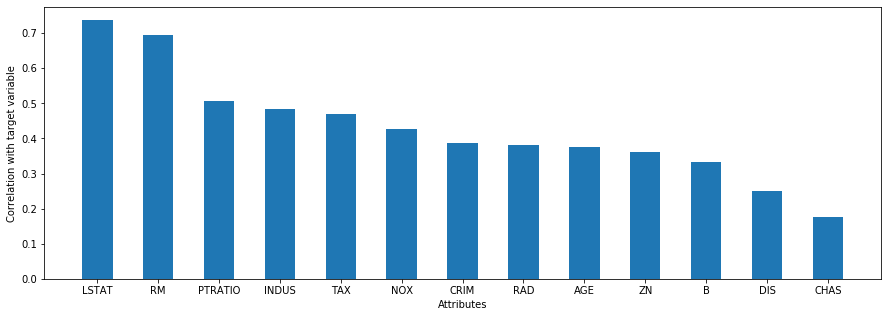

In [11]:
#Calc correlation between every column on the data
corr=df.corr('pearson')
#Take absolute values of correlation
corrs=[abs(corr[attr]['target']) for attr in list(features)]
#zip list
l=list(zip(corrs,list(features)))


#Next sort pairs of list in reverse order
#with correlation value as key for sorting
l.sort(key=lambda x:x[0], reverse=True)

#unzip pairs to list
#zip(*l)-takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs,labels=list(zip((*l)))
#Plot correlations with respect to target variable as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.xticks(index,labels)
plt.show()

### Normalizing the Data with MinMaxScaler

In [12]:
X=df['LSTAT'].values
Y=df['target'].values

In [13]:
#before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [14]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [15]:
#after normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Step 2:Defining error

In [16]:
#defining error
def error(m,x,c,t):
  N=x.size
  e=sum(((m*x+c)-t) ** 2)
  return e*1/(2* N)

# Step 3:Splitting the data
Split the data intro training and testing data.

In [17]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

# Step 4:Build the model

The three functions which constitute the model are :
1.error
2.update
3.gradient_descent

In [18]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c
  

Error threshold:if the error falls below the threshold , the gradient descent process is stopped and the weights are returned.

In [19]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e =error(m,x,c,t)
        if e < error_threshold:
            print('Error less than threshold,stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

%%time is a magic function

In [20]:
%%time 
init_m=0.9 #can be positive or negative
init_c=0
learning_rate=0.001 #less than 0.025
iterations=250
error_threshold=0.001


m,c, error_values, mc_values=gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate,iterations, error_threshold)

Wall time: 99 ms


#### Animation

In [21]:
#as the no. of iterations increases , changes in the line are less noticeable
#inorder to reduce the processing time for the animation, it is advised to choose smaller values
mc_values_anim=mc_values[0:250:5]


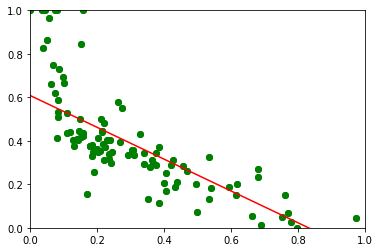

In [22]:
fig,ax= plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5, m*-.5+c
    x2,y2=1.5, m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim= FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video())

Plotting the regression line upon the training dataset

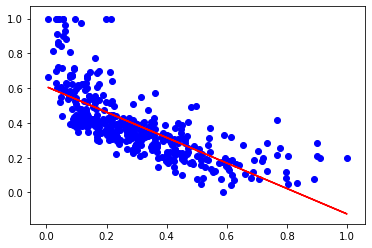

In [23]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain, (m*xtrain+c) , color='r')

Plotting the error values

Text(0.5, 0, 'Iterations')

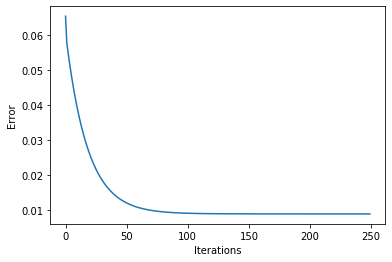

In [24]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# Step 5: Prediction

In [25]:
#Calculate the predictions on the test set as a vectorized operation
predicted=(m*xtest)+c

In [26]:
#Compute MSE for the predicted values on the testing set
mean_squared_error(ytest,predicted)

0.024719575985748133

In [27]:
#Put xtest,ytest,predicted values into a single DataFrame so that we can see the predicted values alongside the testingdata
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])

Plot the predicted values against the target values
1.Predicted values are represented by the red coloured line
2.Target Values are represented by blue coloured points

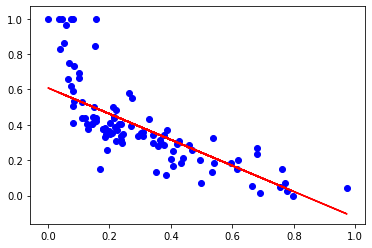

In [28]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

Revert normalization to obtain the predicted price of the houses in $1000s
The predicted values are in the range 0-1. This is not very useful to us when we want to obtain the price.
Use inverse_transform() to scale the values back to original representation

In [29]:
#Reshape to change the shape to shape that is required by the scaler
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

#This is to remove the extra dimension
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)), columns=['x','target_y','predicted'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted
0,29.29,11.8,7.34
1,6.86,23.3,27.73
2,10.36,23.1,24.55
3,4.63,50.0,29.75
4,8.94,21.4,25.84
